In [5]:
pip install tensorflow matplotlib

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.2/390.3 MB 3.1 MB/s eta 0:02:05
   ---------------------------------------- 0.4/390.3 MB 3.8 MB/s eta 0:01:43
   ---------------------------------------- 0.5/390.3 MB 3.5 MB/s eta 0:01:51
   ---------------------------------------- 0.7/390.3 MB 3.5 MB/s eta 0:01:52
   ---------------------------------------- 0.8/390.3 MB 3.6 MB/s eta 0:01:49
   ---------------------------------------- 1.1/390.3 MB 3.6 MB/s eta 0:01:49
   ---------------------------------------- 1.2/390.3 MB 3.7 MB/s eta 0:01:47
   ---------------------------------------- 1.4/390.3 MB 3.6 MB/s eta 0:01:50
   ---------------------------------------- 1.6/390.3 MB 3.6 MB/s eta 0:01:50
   ---------------------------------------- 1.8/390.3 MB 3.6 MB/s eta 0:01:

C:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 33ms/step - accuracy: 0.4864 - loss: 1.4533 - val_accuracy: 0.9325 - val_loss: 0.2556
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.7789 - loss: 0.6608 - val_accuracy: 0.9492 - val_loss: 0.1662
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.8386 - loss: 0.5028 - val_accuracy: 0.9622 - val_loss: 0.1218
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8627 - loss: 0.4339 - val_accuracy: 0.9680 - val_loss: 0.1044
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - accuracy: 0.8771 - loss: 0.3950 - val_accuracy: 0.9735 - val_loss: 0.0855
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9683 - loss: 0.0959
Test Accuracy: 0.9735000133514404


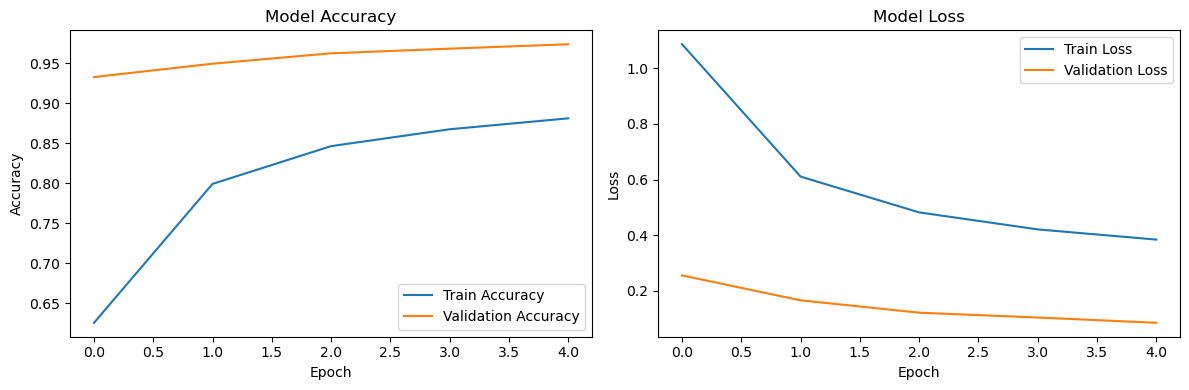

In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 전처리
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# 데이터 증강을 위한 ImageDataGenerator 생성
datagen = ImageDataGenerator(
    rotation_range=20,    # 이미지 회전 (0~20도)
    width_shift_range=0.2,  # 수평 이동
    height_shift_range=0.2, # 수직 이동
    shear_range=0.2,      # 기울이기
    zoom_range=0.2,       # 확대/축소
    horizontal_flip=True,  # 좌우 반전
    fill_mode='nearest'    # 변형된 이미지의 빈 부분을 가장 가까운 값으로 채움
)

# CNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # 드롭아웃을 추가하여 과적합 방지
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습을 위한 데이터 증강 적용
datagen.fit(x_train)

# 학습
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), 
                    epochs=5, 
                    validation_data=(x_test, y_test))

# 테스트 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# 학습 결과 시각화
plt.figure(figsize=(12, 4))

# 정확도 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()